# Author: Ricardo Hernandez 


---


### Contributors: Rhon Ramos, Huy Nguyen, Anuj Shahi

# Project Summary
##### Our goal with this project is to explore what exactly are the economic effects of the COVID-19 Pandemic, specifically how it affected the unemployment rate, Aviation, Stock Market, Wealth Inequality, and Wealth Distribution. In our analysis, we will be focusing on the ***United States.***

**The reason we are investigating these indicators is because each one tells a story about the wellbeing of the economy. We understand that there are possibly more indicators but for the sake of this project,  will only focus on the unemployment rate, Aviation,Stock Market, Wealth Inequality, Wealth Distribution, GDP.**

# Data
##### All datasets are from kaggle. 

# Research Question?
##### How has the Covid-19 pandemic affected the US economy?

## In the following analysis, we will be looking at key indicators in the United States to determined whether the pandemic has had any impact on the country's performance. 


In [1]:
# all necessary imports
import pandas as pd
import numpy as np
import re
import requests



import io
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning
For the most part, OpenRefine was used to clean every dataset.
 

# Exploratory Data Analysis


## Unemployment Rate

In [2]:
# This datatset contains the monthly unemploymeny rate estimates for the 2020 till march of 2021
unemployment = pd.read_csv("unemployment_2020.csv")
 #Source: Labour: Labour market statistics
 #https://data.oecd.org/unemp/unemployment-rate.htm

aviation = pd.read_csv("commercial_flights_totals.csv",encoding='utf-8')


import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

First, we will be looking at the impact Of Covid-19 on the unemployment rate. The goal is to find a correlation between the pandemic and the unemployment rate

In [3]:
unemployment.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,HUR,TOT,PC_LF,M,2020-01,3.5,NaN
1,USA,HUR,TOT,PC_LF,M,2020-02,3.5,NaN
2,USA,HUR,TOT,PC_LF,M,2020-03,4.4,NaN


In [4]:
# Change time format to year - name of month
unemployment["TIME"] = unemployment["TIME"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m').strftime('%Y-%B'))
unemployment.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,HUR,TOT,PC_LF,M,2020-January,3.5,NaN
1,USA,HUR,TOT,PC_LF,M,2020-February,3.5,NaN
2,USA,HUR,TOT,PC_LF,M,2020-March,4.4,NaN
3,USA,HUR,TOT,PC_LF,M,2020-April,14.8,NaN
4,USA,HUR,TOT,PC_LF,M,2020-May,13.3,NaN


In [5]:
#unemployment rate for the full year of 2020
df_2020 = unemployment[["TIME","Value"]].head(12)
df_2020

,TIME,Value
0,2020-January,3.5
1,2020-February,3.5
2,2020-March,4.4
3,2020-April,14.8
4,2020-May,13.3
5,2020-June,11.1
6,2020-July,10.2
7,2020-August,8.4
8,2020-September,7.8
9,2020-October,6.9


Text(0, 0.5, 'Unemployment Rate %')

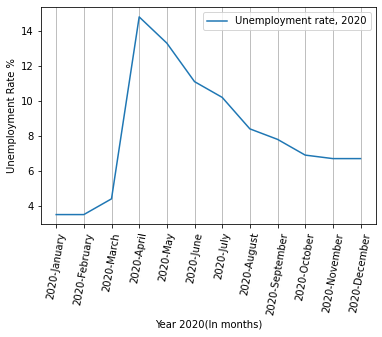

In [6]:
plt.plot(df_2020["TIME"],df_2020["Value"], label = "Unemployment rate, 2020")
plt.xticks(rotation=80)
plt.grid(axis = 'x')
plt.legend(loc="upper right",fontsize=10)
plt.xlabel("Year 2020(In months)",fontsize=10)
plt.ylabel("Unemployment Rate %",fontsize=10)

As shown above, the unemployment rate hit a record in the month of april. This jump can be linked to the sudden restrictions imposed by the United States to stop the pandemic. As a result of these restrictions, many businesses had to shutdown their operations, forcing millions of workers to file for unemployment. 

Next, we will be looking at aviation. Aviation typically contributes 5% of GDP to the U.S. economy. 

## Aviation

In [7]:
aviation.head()

,Week of:,Baseline,Current
0,5-Jan-20,"203,187","207,280"
1,12-Jan-20,"198,507","204,001"
2,19-Jan-20,"195,397","203,842"
3,26-Jan-20,"193,211","206,354"
4,2-Feb-20,"197,414","202,285"


The data above depics the total number of commercial flights in the United States for the year 2020. The data is from the Bureau of Transportation statistics. The baseline number is the average number of flights that are typically conducted during that time, the average is based of previous years


Source: https://www.bts.gov/covid-19/week-in-transportation#aviation

In [8]:
aviation.shape

(52, 3)

In [9]:
#The air traffic data was in format, week- month and year, for my purposes, I decided to change it to month-as-day, month name, year
aviation["Week of:"] = aviation["Week of:"].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%y').strftime('%m-%b,%Y'))
aviation.head()

,Week of:,Baseline,Current
0,"01-Jan,2020","203,187","207,280"
1,"01-Jan,2020","198,507","204,001"
2,"01-Jan,2020","195,397","203,842"
3,"01-Jan,2020","193,211","206,354"
4,"02-Feb,2020","197,414","202,285"


In [10]:
# removes commas from numbers - cannot add numbers with commas
aviation["Current"]= aviation["Current"].replace(',','',regex=True)
aviation["Baseline"]= aviation["Baseline"].replace(',','',regex=True)


In [11]:
# converts both columns to type int from type string
aviation['Current'] = aviation['Current'].astype(int)
aviation['Baseline'] = aviation['Baseline'].astype(int)

In [12]:
#Groups rows into months. Finds all thr rows with the same months and adds up the numbers
# for both baseline column and present column
months = aviation[["Week of:","Current"]].groupby(["Week of:"]).agg("sum")
months = months.reset_index()
months.columns = ["Month","Total US commercial Flights"]
graph_1 = months.sort_values( by = ["Month"], ascending=True)


months2 = aviation[["Week of:","Baseline"]].groupby(["Week of:"]).agg("sum")
months2 = months2.reset_index()
months2.columns = ["Month","Total US commercial Flights"]
graph_2 = months2.sort_values( by = ["Month"], ascending=True)

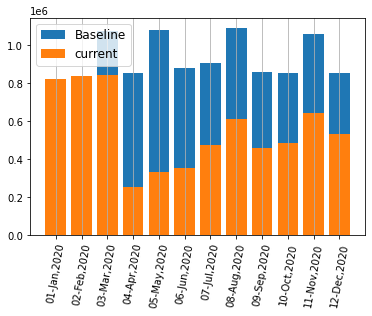

In [13]:
plt.bar(graph_2["Month"],graph_2["Total US commercial Flights"], label = "Baseline")
plt.bar(graph_1["Month"],graph_1["Total US commercial Flights"], label = "current")


plt.xticks(rotation=80)
plt.grid(axis = 'x')
plt.legend(loc="upper left",fontsize=12)

The Graph above shows 2 bars. The Baseline bar is the average total number of commercial flights. The whole point of the baseline bar is so I can compare what would be considered normal if covid-19 did not happen. Essentially the control group. The Orange bar shows the total number of commercial flights throughout the year of 2020.


Based of my understanding of when covid-19 restrictions took effect in the United States. The graph supports the fact that once covid-19 became a nation-wide concern, air traffic was affected. Consequently, given how much this industry contributes to the overall GDP of the country, it is safe to assume that this lost in air traffic greatly impacted the economy of the country as a result of the pandemic.


## Stock Market

In [14]:
# Financial stock market API
!pip install yfinance

In [15]:
#Required packages
import yfinance as yf  
import matplotlib.pyplot as plt

GSPC Stock

In [16]:
#https://finance.yahoo.com/quote/%5EGSPC/history?period1=1546300800&period2=1620259200&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true
gspc = yf.download('^GSPC','2019-01-01','2021-05-06')
#data = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])


[*********************100%***********************]  1 of 1 completed


In [17]:
# Prints first 10
gspc.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000
2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4052480000
2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000
2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000
2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000


In [18]:
# Sum of each column
gspc.sum()

Open         1.882883e+06
High         1.893980e+06
Low          1.871091e+06
Close        1.883581e+06
Adj Close    1.883581e+06
Volume       2.557360e+12
dtype: float64

In [19]:
# Check for null values
gspc.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

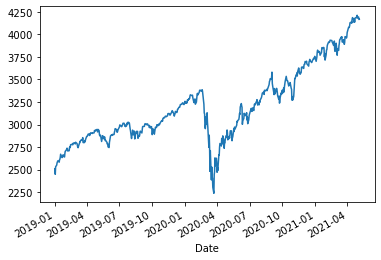

In [20]:
# Line graph for gspc Adj Close
gspc["Adj Close"].plot()
plt.show()

NDX Stock

In [21]:
# https://finance.yahoo.com/quote/%5ENDX/history?p=%5ENDX
ndx = yf.download('NDX','2019-01-01','2021-05-06')
#ndx = ndx.stack().reset_index().rename(index=str, columns={"level_1": "C"}).sort_values(['Date'])
ndx.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,6198.680176,6394.740234,6198.680176,6360.870117,6360.870117,2261800000
2019-01-03,6274.759766,6292.680176,6139.399902,6147.129883,6147.129883,2607290000
2019-01-04,6250.049805,6445.200195,6234.589844,6422.669922,6422.669922,2579550000
2019-01-07,6434.549805,6521.439941,6412.979980,6488.250000,6488.250000,2507550000
2019-01-08,6555.910156,6574.729980,6457.000000,6551.850098,6551.850098,2378290000
2019-01-09,6576.540039,6631.060059,6549.439941,6600.689941,6600.689941,2422590000
2019-01-10,6551.049805,6625.109863,6517.540039,6620.939941,6620.939941,2179080000
2019-01-11,6579.890137,6604.560059,6562.040039,6601.399902,6601.399902,2066500000
2019-01-14,6536.370117,6566.870117,6512.640137,6541.040039,6541.040039,1942210000


In [22]:
# Sum of each column
ndx.sum()

Open         5.653295e+06
High         5.696615e+06
Low          5.606901e+06
Close        5.656081e+06
Adj Close    5.656081e+06
Volume       2.060112e+12
dtype: float64

In [23]:
# Check for null values
ndx.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

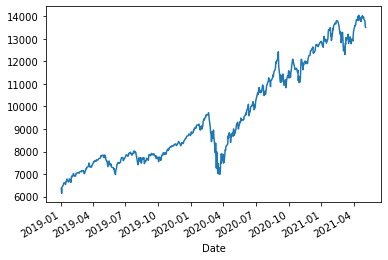

In [24]:
# Line graph for gspc Adj Close
ndx["Adj Close"].plot()
plt.show()

 The S&P 500 and Nasdaq are the indexes that attempt to gauge the health of financial market by tracking specific stocks. As shown above, the S&P 500 which is gspc and Nasdaq which is ndx collapsed in the month of april. This jump can be linked to the sudden restrictions imposed by the United States to stop the pandemic. As a result of these restrictions, many businesses had to shutdown their operation which impacted the stock market. However, over period of time, we can see that stock market recovered and even got higher than before the pandemic started. Therefore, we can conclude that covid 19 impacted the stock market for couple months only.



## Interest Rate

In [25]:
# Read 2019 Interest CSV file
# https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2019
interest2019 = pd.read_csv("2019 interest_data.csv")

interest2019.head(10)

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/19,2.40,2.40,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1,1/3/19,2.42,2.42,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2,1/4/19,2.40,2.42,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
3,1/7/19,2.42,2.42,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
4,1/8/19,2.40,2.42,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00
5,1/9/19,2.40,2.42,2.45,2.52,2.59,2.56,2.54,2.57,2.64,2.74,2.90,3.03
6,1/10/19,2.42,2.42,2.43,2.51,2.59,2.56,2.54,2.56,2.63,2.74,2.92,3.06
7,1/11/19,2.41,2.43,2.43,2.50,2.58,2.55,2.51,2.52,2.60,2.71,2.90,3.04
8,1/14/19,2.42,2.43,2.45,2.52,2.57,2.53,2.51,2.53,2.60,2.71,2.91,3.06
9,1/15/19,2.41,2.43,2.45,2.52,2.57,2.53,2.51,2.53,2.61,2.72,2.92,3.08


In [26]:
# Focused on 30 Years of 2019 Interest Rate
new_interest2019 = interest2019[['Date','30 Yr']]
new_interest2019

,Date,30 Yr
0,1/2/19,2.97
1,1/3/19,2.92
2,1/4/19,2.98
3,1/7/19,2.99
4,1/8/19,3.00
...,...,...
245,12/24/19,2.33
246,12/26/19,2.33
247,12/27/19,2.32
248,12/30/19,2.34


In [27]:
# 5 number summary
new_interest2019.describe()

,30 Yr
count,250.000000
mean,2.580400
std,0.357891
min,1.940000
25%,2.260000
50%,2.575000
75%,2.940000
max,3.130000


In [28]:
# Read 2020 Interest CSV file
# https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2020
interest2020 = pd.read_csv("2020 interest_data.csv")

interest2020.head(10)

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/20,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,1/3/20,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2,1/6/20,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
3,1/7/20,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
4,1/8/20,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35
5,1/9/20,1.53,1.55,1.54,1.56,1.54,1.58,1.59,1.65,1.77,1.85,2.17,2.38
6,1/10/20,1.52,1.55,1.54,1.55,1.53,1.56,1.59,1.63,1.74,1.83,2.14,2.28
7,1/13/20,1.54,1.56,1.57,1.57,1.53,1.58,1.60,1.65,1.76,1.85,2.16,2.30
8,1/14/20,1.53,1.56,1.57,1.57,1.53,1.58,1.59,1.63,1.74,1.82,2.12,2.27
9,1/15/20,1.53,1.56,1.57,1.58,1.54,1.56,1.56,1.60,1.71,1.79,2.09,2.23


In [29]:
# Focused on 30 Years of 2020 Interest Rate
new_interest2020 = interest2020[['Date','30 Yr']]
new_interest2020

,Date,30 Yr
0,1/2/20,2.33
1,1/3/20,2.26
2,1/6/20,2.28
3,1/7/20,2.31
4,1/8/20,2.35
...,...,...
246,12/24/20,1.66
247,12/28/20,1.67
248,12/29/20,1.67
249,12/30/20,1.66


In [30]:
# 5number summary
new_interest2020.describe()

,30 Yr
count,251.000000
mean,1.556135
std,0.284045
min,0.990000
25%,1.370000
50%,1.470000
75%,1.660000
max,2.380000


In [31]:
# Concat two of data
new_interest = pd.concat([new_interest2019, new_interest2020])
new_interest

,Date,30 Yr
0,1/2/19,2.97
1,1/3/19,2.92
2,1/4/19,2.98
3,1/7/19,2.99
4,1/8/19,3.00
...,...,...
246,12/24/20,1.66
247,12/28/20,1.67
248,12/29/20,1.67
249,12/30/20,1.66


In [32]:
import datetime
#new_interest=new_interest["Date"].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%B'))
new_interest['Date']=pd.to_datetime(new_interest['Date'].astype(str), dayfirst=True)

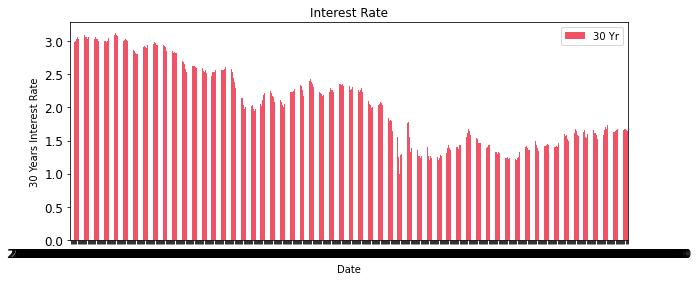

In [33]:
import matplotlib.pyplot as plot

# Bar chart

new_interest.plot.bar(x='Date',
            rot=0,
            color=[(240/255,83/255,101/255), (250/255,188/255,42/255)], # passing normalized RGB colors 
            figsize=(10,4), # Figsize to make the plot larger
            title='Interest Rate', # Adding a title to the top
            xlabel="Date", # Adding a label on the xaxis
            ylabel="30 Years Interest Rate", # Adding a label on y axis
            fontsize='large'); 


The federal reserve interest rate is used for measuring the economy. The change in interest rate can affect
both inflation and recession. The interest rate indicates the direction of the economy whether is expanding 
or contracting. Lower interest rates motivates businesses to borrow funds to invest in expansion such as
buying new house, car, investing in equipment for businesses and hiring more people. Higher interest rates 
restrain such borrowing by consumers and businesses. People do not want to invest or buy assests which
helps the expansion of the economy because with the higher interest rate it will be expensive for
them to carry on such financial activities.

As shown above, we can see that the mean of the federal interest rate went lower in 2020.
Also, we can see that on the graph. It went downward in 2020. From this, we can conclude that covid 19
impacted the economy to shrink where Fed had to lower the interest rate to save it from going into
recession or depression.





## US COVID 

In [34]:
# https://www.kaggle.com/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy?select=raw_data.csv
covid = pd.read_csv("raw_data.csv")
#covid.columns = map(lambda x: str(x).title(), covid.columns)
covid.head(10)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
5,AFG,Afghanistan,2020-01-05,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
6,AFG,Afghanistan,2020-01-06,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
7,AFG,Afghanistan,2020-01-07,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
8,AFG,Afghanistan,2020-01-08,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
9,AFG,Afghanistan,2020-01-09,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [35]:
# Focused on US location of COVID cases
cov_US = covid[covid['location'] == "United States"]
cov_US


,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
48121,USA,United States,2019-12-31,NaN,NaN,NaN,331002647,54225.446,0.924,#NUM!,#NUM!,#NUM!,19.617637,10.90090556
48122,USA,United States,2020-01-01,NaN,NaN,0.0,331002647,54225.446,0.924,#NUM!,#NUM!,#NUM!,19.617637,10.90090556
48123,USA,United States,2020-01-02,NaN,NaN,0.0,331002647,54225.446,0.924,#NUM!,#NUM!,#NUM!,19.617637,10.90090556
48124,USA,United States,2020-01-03,NaN,NaN,0.0,331002647,54225.446,0.924,#NUM!,#NUM!,#NUM!,19.617637,10.90090556
48125,USA,United States,2020-01-04,NaN,NaN,0.0,331002647,54225.446,0.924,#NUM!,#NUM!,#NUM!,19.617637,10.90090556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48410,USA,United States,2020-10-15,7916100.0,216872.0,NaN,331002647,54225.446,0.924,15.88440922,12.2870626,#NUM!,19.617637,10.90090556
48411,USA,United States,2020-10-16,7979885.0,217700.0,NaN,331002647,54225.446,0.924,15.89243456,12.29087325,#NUM!,19.617637,10.90090556
48412,USA,United States,2020-10-17,8050141.0,218599.0,NaN,331002647,54225.446,0.924,15.90120016,12.29499428,#NUM!,19.617637,10.90090556
48413,USA,United States,2020-10-18,8106752.0,219289.0,NaN,331002647,54225.446,0.924,15.90820785,12.29814577,#NUM!,19.617637,10.90090556


In [36]:
# Focus on location, date, and total cases
covid1=cov_US[['location','date','total_cases']]
covid1

,location,date,total_cases
48121,United States,2019-12-31,NaN
48122,United States,2020-01-01,NaN
48123,United States,2020-01-02,NaN
48124,United States,2020-01-03,NaN
48125,United States,2020-01-04,NaN
...,...,...,...
48410,United States,2020-10-15,7916100.0
48411,United States,2020-10-16,7979885.0
48412,United States,2020-10-17,8050141.0
48413,United States,2020-10-18,8106752.0


In [37]:
# Count number of null values
covid1.isnull().sum()


location        0
date            0
total_cases    21
dtype: int64

In [38]:
# Remove all null values 
covid1.dropna( inplace=True)

<ipython-input-38-294e3c7074bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid1.dropna( inplace=True)


In [39]:
# Creating a new datframe
covid_df = pd.DataFrame(covid1)
covid_df.head()

,location,date,total_cases
48142,United States,2020-01-21,1.0
48143,United States,2020-01-22,1.0
48144,United States,2020-01-23,1.0
48145,United States,2020-01-24,1.0
48146,United States,2020-01-25,2.0


In [40]:
covid_df.tail

<bound method NDFrame.tail of             location        date  total_cases
48142  United States  2020-01-21          1.0
48143  United States  2020-01-22          1.0
48144  United States  2020-01-23          1.0
48145  United States  2020-01-24          1.0
48146  United States  2020-01-25          2.0
...              ...         ...          ...
48410  United States  2020-10-15    7916100.0
48411  United States  2020-10-16    7979885.0
48412  United States  2020-10-17    8050141.0
48413  United States  2020-10-18    8106752.0
48414  United States  2020-10-19    8154595.0

[273 rows x 3 columns]>

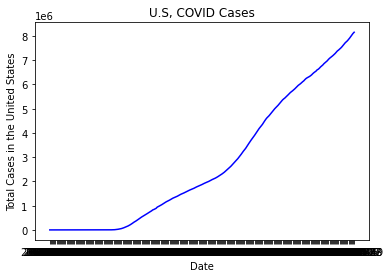

In [41]:
# Graph
import matplotlib.pyplot as plt
day = covid_df['date']
case = covid_df['total_cases']
plt.plot(day, case, color='Blue')
plt.xlabel('Date')
plt.ylabel('Total Cases in the United States')
plt.title('U.S, COVID Cases')
plt.show()

The graph above depicts the total cases in the United States. The graph starts in january and ends in the month of december 2020. The graph shows a huge increase of cases throughout the year. Total cases seeing a huge spike in the month of april. 